In [1]:
import pandas as pd

In [2]:
import numpy as np

In [5]:
df = pd.read_csv('../data/dailyActivity_merged.csv')

In [6]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

In [8]:
df.columns.tolist()

['Id',
 'ActivityDate',
 'TotalSteps',
 'TotalDistance',
 'TrackerDistance',
 'LoggedActivitiesDistance',
 'VeryActiveDistance',
 'ModeratelyActiveDistance',
 'LightActiveDistance',
 'SedentaryActiveDistance',
 'VeryActiveMinutes',
 'FairlyActiveMinutes',
 'LightlyActiveMinutes',
 'SedentaryMinutes',
 'Calories']

In [12]:
print('Row count before dropping duplicates', len(df))

df = df.drop_duplicates()

Row count before dropping duplicates 457


In [13]:
print('Row count after dropping duplicates', len(df))

Row count after dropping duplicates 457


In [15]:
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        457 non-null    int64         
 1   ActivityDate              457 non-null    datetime64[ns]
 2   TotalSteps                457 non-null    int64         
 3   TotalDistance             457 non-null    float64       
 4   TrackerDistance           457 non-null    float64       
 5   LoggedActivitiesDistance  457 non-null    float64       
 6   VeryActiveDistance        457 non-null    float64       
 7   ModeratelyActiveDistance  457 non-null    float64       
 8   LightActiveDistance       457 non-null    float64       
 9   SedentaryActiveDistance   457 non-null    float64       
 10  VeryActiveMinutes         457 non-null    int64         
 11  FairlyActiveMinutes       457 non-null    int64         
 12  LightlyActiveMinutes  

In [27]:
df['is_active_day'] = (df['TotalSteps'] >= 7500).astype(int)

df[['TotalSteps', 'is_active_day']].head()

,TotalSteps,is_active_day
0,11004,1
1,17609,1
2,12736,1
3,13231,1
4,12041,1


In [34]:
df.to_csv('../data/cleaned_dailyActivity.csv', index = False)

In [35]:
df.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,is_active_day
count,4.570000e+02,457,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,4.628595e+09,2016-04-04 04:40:26.258205696,6546.562363,4.663523,4.609847,0.179427,1.180897,0.478643,2.890197,0.001904,16.623632,13.070022,170.070022,995.282276,2189.452954,0.387309
min,1.503960e+09,2016-03-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000,0.000000
25%,2.347168e+09,2016-04-02 00:00:00,1988.000000,1.410000,1.280000,0.000000,0.000000,0.000000,0.870000,0.000000,0.000000,0.000000,64.000000,728.000000,1776.000000,0.000000
50%,4.057193e+09,2016-04-05 00:00:00,5986.000000,4.090000,4.090000,0.000000,0.000000,0.020000,2.930000,0.000000,0.000000,1.000000,181.000000,1057.000000,2062.000000,0.000000
75%,6.391747e+09,2016-04-08 00:00:00,10198.000000,7.160000,7.110000,0.000000,1.310000,0.670000,4.460000,0.000000,25.000000,16.000000,257.000000,1285.000000,2667.000000,1.000000
max,8.877689e+09,2016-04-12 00:00:00,28497.000000,27.530001,27.530001,6.727057,21.920000,6.400000,12.510000,0.100000,202.000000,660.000000,720.000000,1440.000000,4562.000000,1.000000
std,2.293781e+09,NaN,5398.493064,4.082072,4.068540,0.849232,2.487159,0.830995,2.237523,0.008487,28.919704,36.208635,122.205372,337.021404,815.484523,0.487669


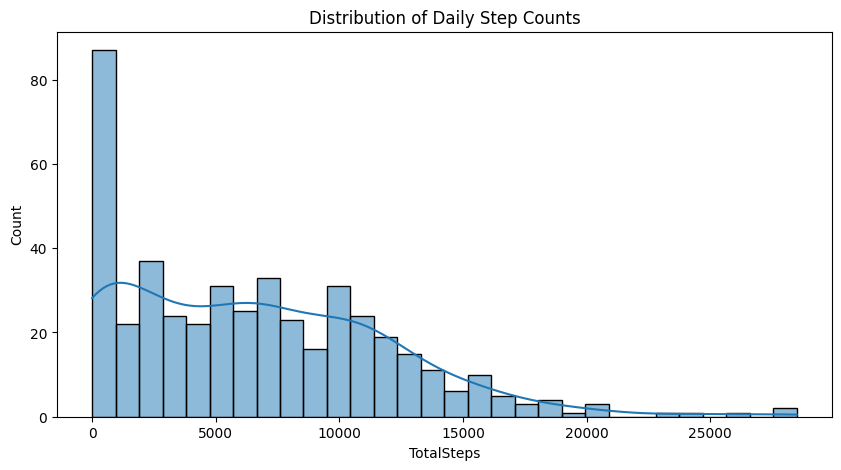

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 5))
sns.histplot(df['TotalSteps'], bins = 30, kde = True)
plt.title('Distribution of Daily Step Counts')
plt.show()

In [45]:
avgStepsPerId = df.groupby('Id')['TotalSteps'].mean().reset_index()
avgStepsPerId = avgStepsPerId.sort_values('TotalSteps', ascending = False)

In [73]:
top5N = 5
top10N = 10
Bottom5N = 5
Top5Users = avgStepsPerId.nlargest(top5N, 'TotalSteps')
Top10Users = avgStepsPerId.nlargest(top10N, 'TotalSteps')
Bottom5Users = avgStepsPerId.nsmallest(Bottom5N, 'TotalSteps')

In [78]:
colors = []
for user in avgStepsPerId['Id']:
    if user in Top5Users['Id'].values:
        colors.append('green')
    elif user in Top10Users['Id'].values and user not in Top5Users['Id'].values:
        colors.append('orange')
    elif user in Bottom5Users['Id'].values:
        colors.append('red')
    else:
        colors.append('gold')

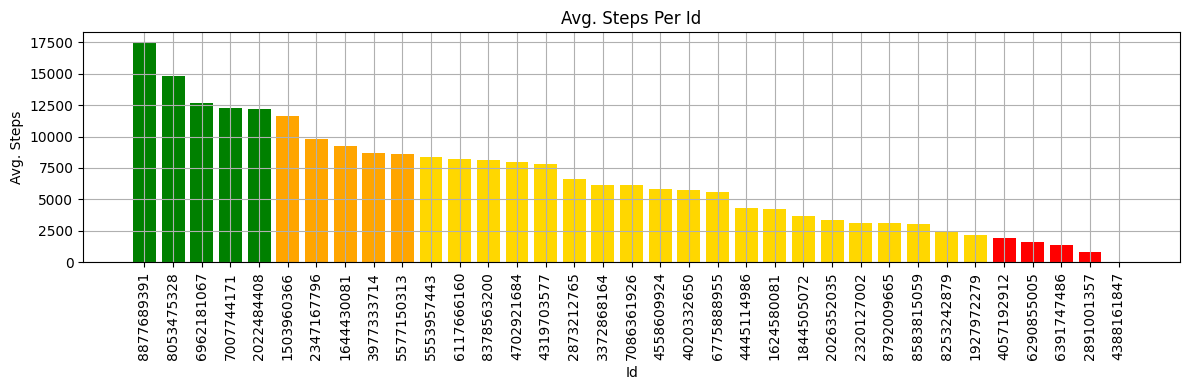

In [79]:
plt.figure(figsize = (12,4))
plt.bar(avgStepsPerId['Id'].astype(str), avgStepsPerId['TotalSteps'], color = colors)
plt.title('Avg. Steps Per Id')
plt.xlabel('Id')
plt.xticks(rotation = 90)
plt.ylabel('Avg. Steps')
plt.tight_layout()
plt.grid(True)
plt.show()

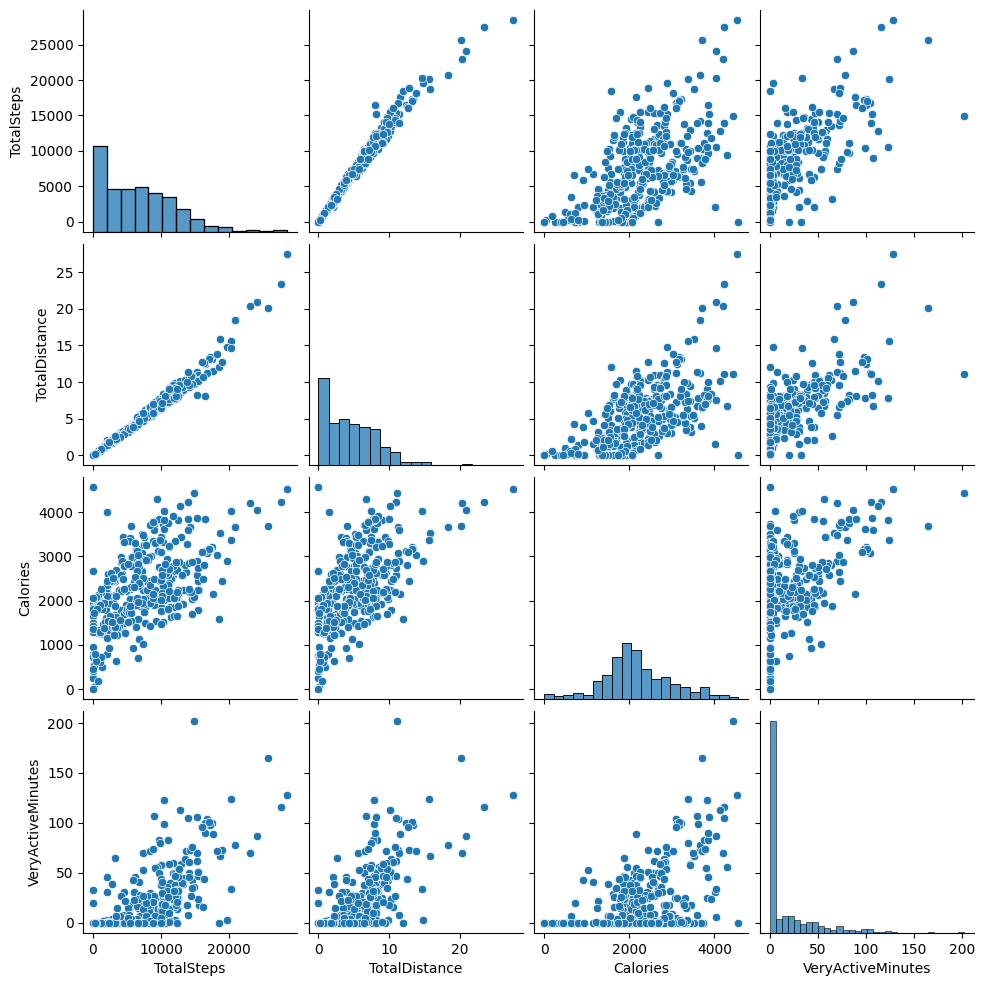

In [80]:
sns.pairplot(df[['TotalSteps', 'TotalDistance', 'Calories', 'VeryActiveMinutes']])

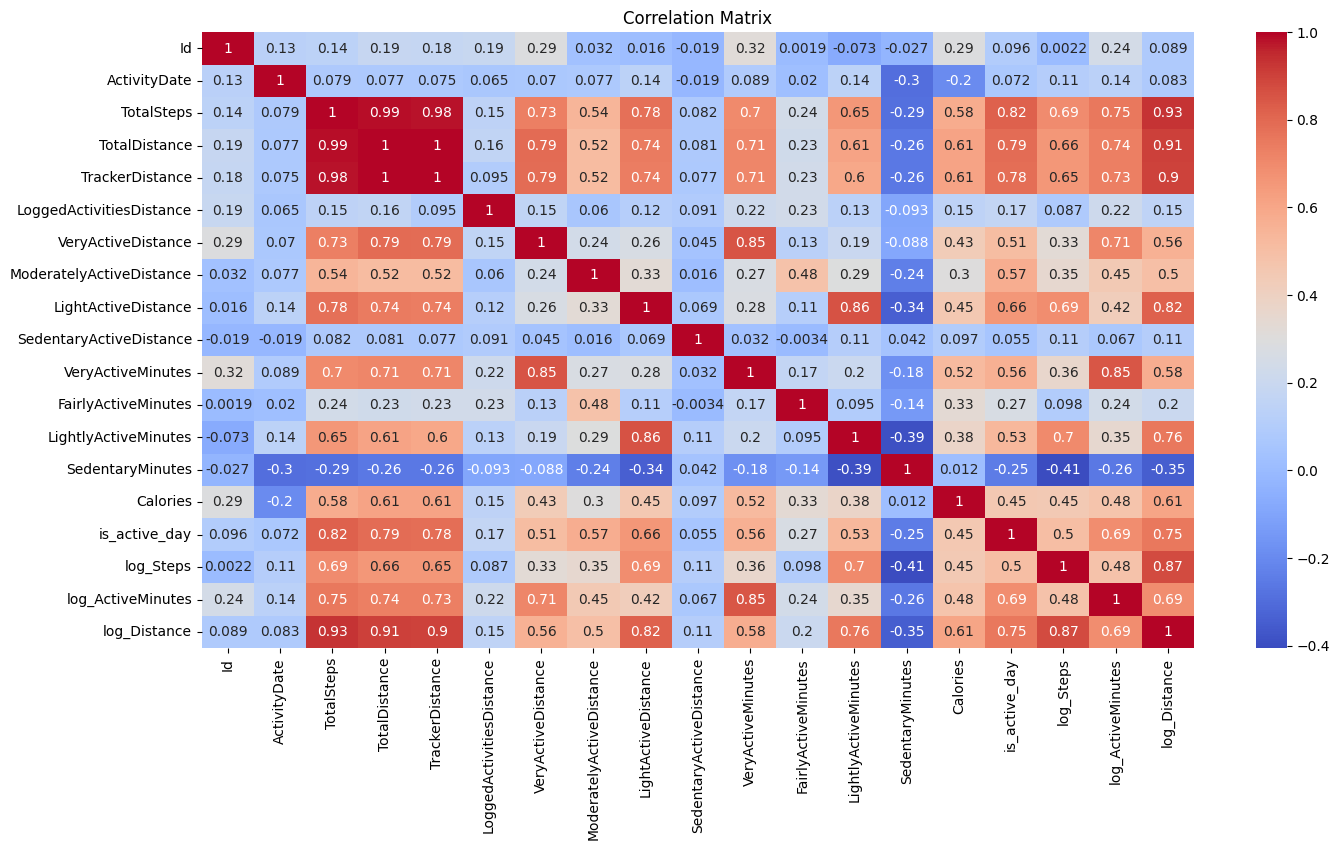

In [88]:
plt.figure(figsize = (16, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()
